# Phase Portraits for Linear Systems

This notebook generates phase portraits for the five cases of 2D linear systems with diagonal matrices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

folder = "figures"

In [2]:
def plot_phase_portrait(lambda1, lambda2, title, filename, num_trajectories=12):
    """
    Plot phase portrait for system dx/dt = lambda1*x, dy/dt = lambda2*y
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create meshgrid for streamplot
    x = np.linspace(-3, 3, 20)
    y = np.linspace(-3, 3, 20)
    X, Y = np.meshgrid(x, y)
    
    # Vector field
    U = lambda1 * X
    V = lambda2 * Y
    
    # Normalize for better visualization
    M = np.sqrt(U**2 + V**2)
    M[M == 0] = 1  # Avoid division by zero
    U_norm = U / M
    V_norm = V / M
    
    # Plot vector field
    ax.quiver(X, Y, U_norm, V_norm, M, alpha=0.6, cmap='viridis', scale=25)
    
    # Plot trajectories
    t = np.linspace(0, 3, 1000)
    
    # Different initial conditions
    angles = np.linspace(0, 2*np.pi, num_trajectories, endpoint=False)
    
    for angle in angles:
        # Initial condition on circle of radius 1
        x0 = np.cos(angle)
        y0 = np.sin(angle)
        
        # Solution: x(t) = x0*e^(lambda1*t), y(t) = y0*e^(lambda2*t)
        x_traj = x0 * np.exp(lambda1 * t)
        y_traj = y0 * np.exp(lambda2 * t)
        
        # Only plot if trajectories stay in bounds
        valid_idx = (np.abs(x_traj) < 3) & (np.abs(y_traj) < 3)
        
        if np.any(valid_idx):
            ax.plot(x_traj[valid_idx], y_traj[valid_idx], 'b-', linewidth=1.5, alpha=0.7)
            
            # Add arrow to show direction
            if lambda1 > 0 or lambda2 > 0:  # Outward flow
                arrow_idx = int(0.3 * np.sum(valid_idx))
            else:  # Inward flow
                arrow_idx = int(0.7 * np.sum(valid_idx))
            
            if arrow_idx < np.sum(valid_idx) - 1:
                x_indices = np.where(valid_idx)[0]
                idx1 = x_indices[min(arrow_idx, len(x_indices)-2)]
                idx2 = x_indices[min(arrow_idx+1, len(x_indices)-1)]
                
                dx = x_traj[idx2] - x_traj[idx1]
                dy = y_traj[idx2] - y_traj[idx1]
                ax.arrow(x_traj[idx1], y_traj[idx1], dx, dy, 
                        head_width=0.15, head_length=0.1, fc='blue', ec='blue', alpha=0.7)
    
    # Highlight eigendirections (axes in this case)
    ax.axhline(y=0, color='r', linewidth=2, alpha=0.5, label='Eigendirections')
    ax.axvline(x=0, color='r', linewidth=2, alpha=0.5)
    
    # Origin
    ax.plot(0, 0, 'ko', markersize=10, zorder=5)
    
    # Formatting
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved {filename}")

## 1. Unstable Node: $0 < \lambda < \mu$

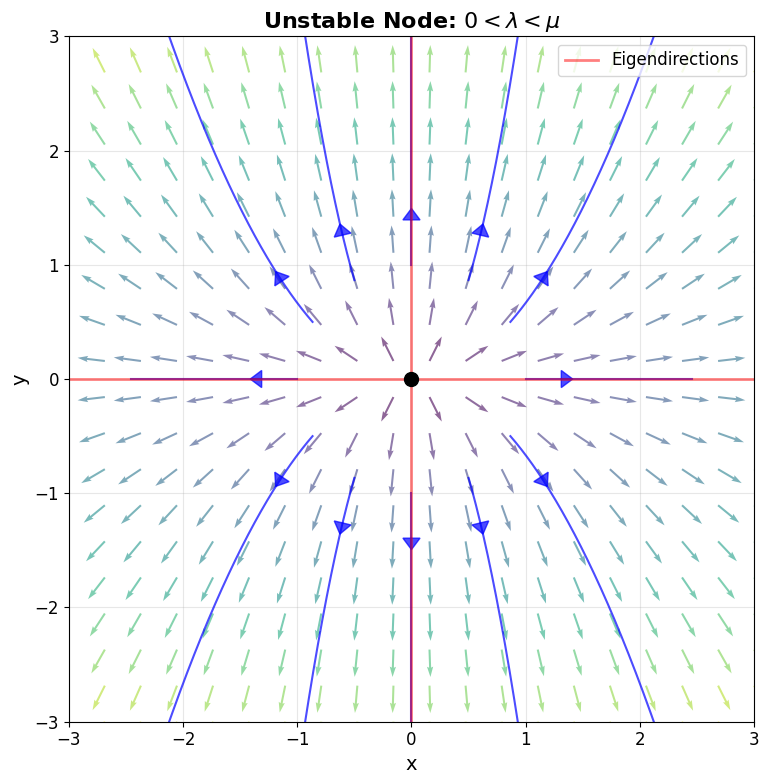

Saved figures/unstable_node.png


In [3]:
plot_phase_portrait(lambda1=0.3, lambda2=0.6, 
                    title=r'Unstable Node: $0 < \lambda < \mu$',
                    filename=f'{folder}/unstable_node.png')

## 2. Stable Node: $\mu < \lambda < 0$

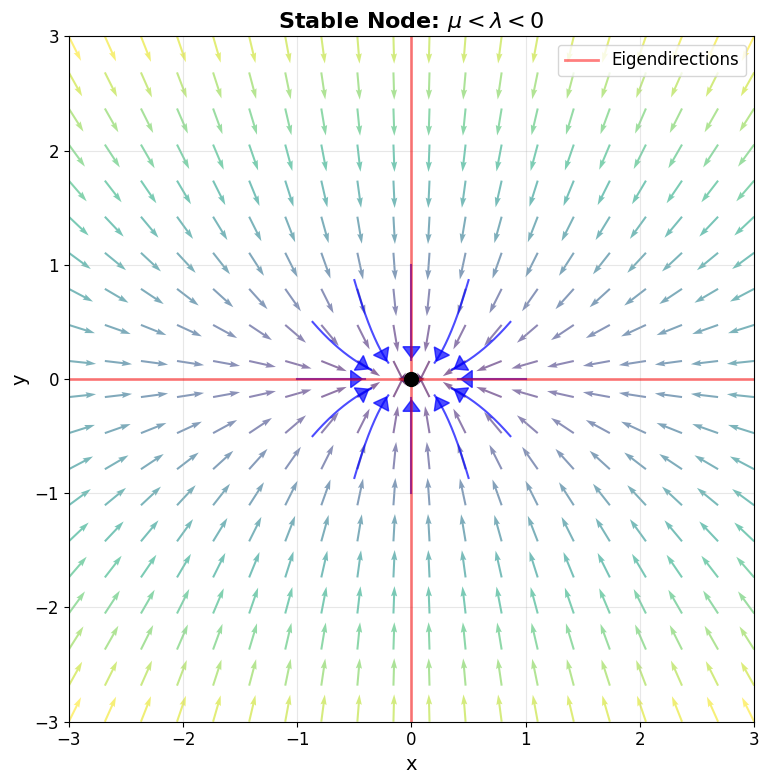

Saved figures/stable_node.png


In [4]:
plot_phase_portrait(lambda1=-0.3, lambda2=-0.6, 
                    title=r'Stable Node: $\mu < \lambda < 0$',
                    filename=f'{folder}/stable_node.png')

## 3. Saddle: $\lambda < 0 < \mu$

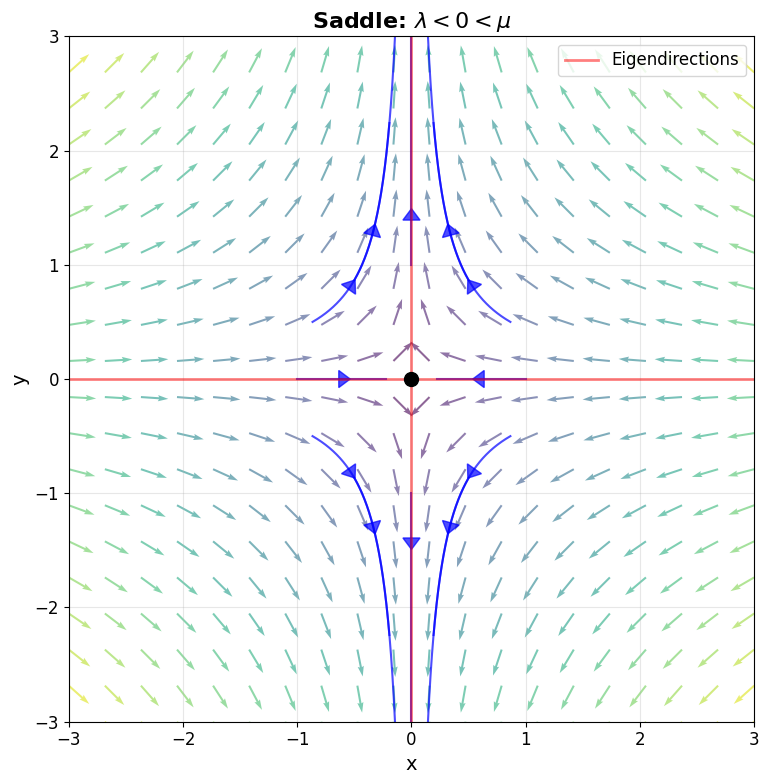

Saved figures/saddle.png


In [5]:
plot_phase_portrait(lambda1=-0.5, lambda2=0.5, 
                    title=r'Saddle: $\lambda < 0 < \mu$',
                    filename=f'{folder}/saddle.png')

## 4. Stable Star Node (Sink): $\lambda = \mu < 0$

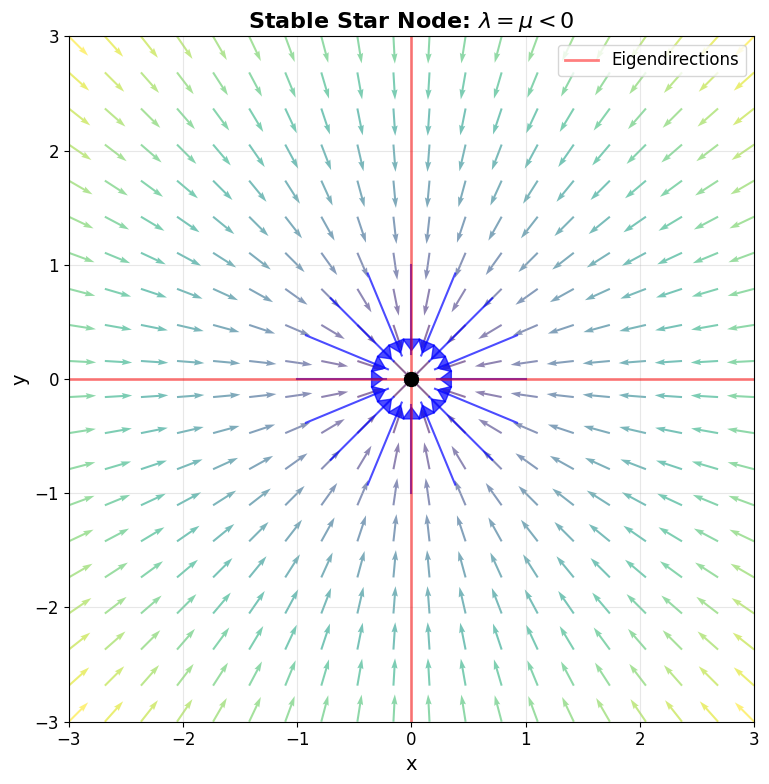

Saved figures/stable_star.png


In [6]:
plot_phase_portrait(lambda1=-0.5, lambda2=-0.5, 
                    title=r'Stable Star Node: $\lambda = \mu < 0$',
                    filename=f'{folder}/stable_star.png',
                    num_trajectories=16)

## 5. Unstable Star Node (Source): $0 < \lambda = \mu$

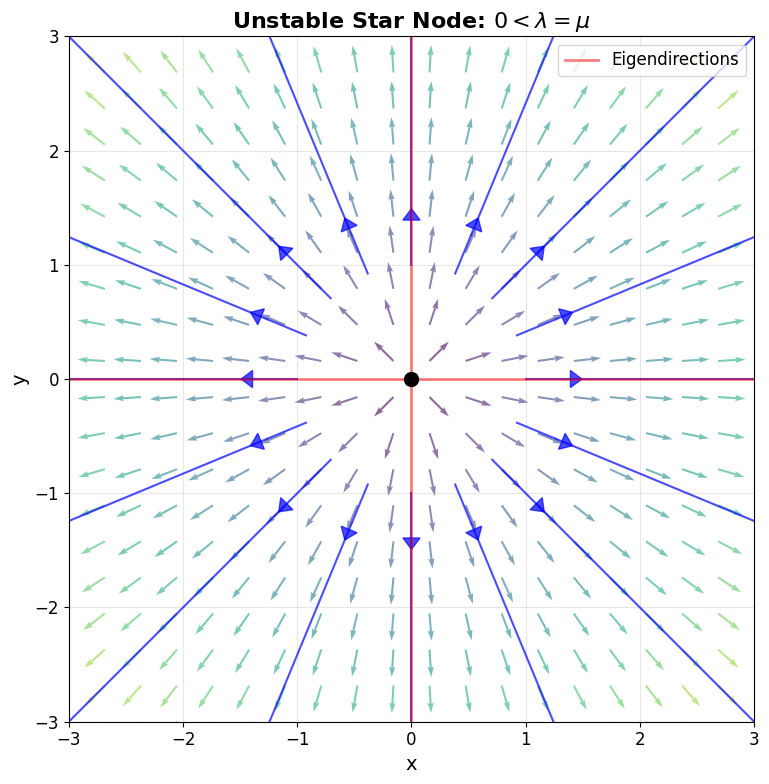

Saved figures/unstable_star.png


In [7]:
plot_phase_portrait(lambda1=0.5, lambda2=0.5, 
                    title=r'Unstable Star Node: $0 < \lambda = \mu$',
                    filename=f'{folder}/unstable_star.png',
                    num_trajectories=16)